In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import os

In [3]:
path = os.getcwd() + '/ex1/ex1data1.txt'

In [4]:
# load data (csv) into a data frame, an object
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head() # view first n entries, default 5
# data.tail()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe() # calculates stats

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


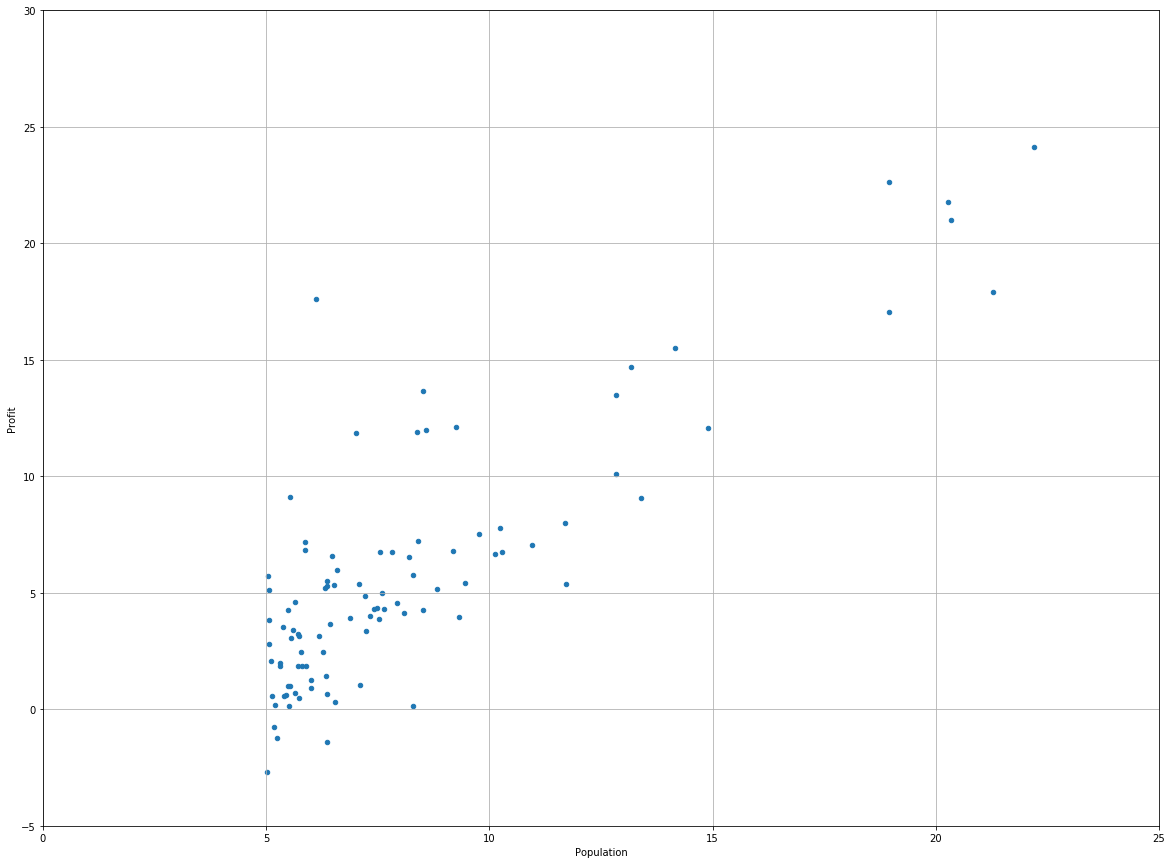

In [6]:
# plot data, wrapper for matplotlib
data.plot(kind='scatter', x='Population', y='Profit', xlim=(0,25), ylim=(-5,30),figsize=(20,15),grid=True)

implement linear regression model on the data

In [7]:
# define squared error cost function
def compute_cost(X, y, theta):
    predicted_y = X * theta # compute predicted y using linear algebra
    error = predicted_y - y
    squared_error = np.power(error, 2)
    sum_squared_error = np.sum(squared_error)
    squared_error_cost = sum_squared_error / (2 * X.shape[0])
    return squared_error_cost

In [8]:
# manipulate data from pandas data frame into X, y and theta
# store all data as matrix of m x n
# not array, tho array is easier to manipulate using multiplication


data.insert(0, 'x0', 1) # insert feature 0

In [9]:
# slice the data
X = data.iloc[:,:-1] # set X to be the first to second last columns
y = data.iloc[:,-1:] # set y to be the last column
theta = np.mat(np.zeros((X.shape[1], 1)))
# initialise empty theta, using np.array for decimal points
# if used np.array[0,0], then cells are initialised  as int
# alt method use np.zeros
# uses (X.shape[1],1) to auto assign the dimension of theta
# results in 2*1 matrix

X, y = np.mat(X.values), np.mat(y.values) # convert to matrix

In [10]:
# test compute_cost function and variables are initialised properly
# answer should be 32.072733877455676
compute_cost(X, y, theta)

32.072733877455676

In [11]:
# # define gradient desecnt function (loop)
# def gradient_descent(X, y, theta, alpha, iters):
#     cost = np.zeros(iters) # create an array for storing history of costs after each iteration
#     theta_number = int(theta.shape[0]) # number of theta
#     temp = theta # initialise temp, for storing calculated theta
    
#     for i in range(iters):
#         error = (X * theta) - y # returns a list of all errors
        
#         for j in range(theta_number):
# #             gradient = np.sum(np.multiply(error, X[:, j])) # multiply returns scalar product of each row, then sum up
# #             <class 'numpy.matrixlib.defmatrix.matrix'> <class 'numpy.matrixlib.defmatrix.matrix'>
#             gradient = (error.T *  X[:, j]) # returns the dot product directly (matrix([number]), without sum (converts to float/int)
#             increment = alpha / X.shape[0] * gradient
#             temp[j, 0] = theta[j, 0] - increment
            
#         theta = temp
#         cost[i] = compute_cost(X, y, theta)
        
#     return theta, cost

In [12]:
# define gradient desecnt function (vectorized version of above)
def gradient_descent(X, y, theta, alpha, iters):
    cost = np.zeros(iters) # create an array for storing history of costs after each iteration
    
    for i in range(iters):
        # error = (X * theta) - y
        # gradient = X.T * error # transpose X features, to solve for matrix vector product, X is 100 * n, error is 100*1 
        # increment = alpha / X.shape[0] * gradient
        # theta = theta-increment
        theta = theta - alpha / X.shape[0] * (X.T * ((X * theta) - y))
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

In [13]:
# initialise variables for learning rate and itertations
alpha = 0.01
iters = 10000
theta = np.mat(np.zeros((X.shape[1], 1)))

# perform gradient descent
theta_best, cost = gradient_descent(X, y, theta, alpha, iters)
theta_best

matrix([[-3.89578082],
        [ 1.19303364]])

In [14]:
compute_cost(X, y, theta_best)

4.476971375975178

Plotting graphs

In [15]:
# x = np.linspace(data.Population.min(), data.Population.max(), 100) # create an array of evenly space values, used as x
x = np.array(X[:, 1].A1)
y_predicted = theta_best[0,0] + theta_best[1,0]*x # calculate predicted y from theta

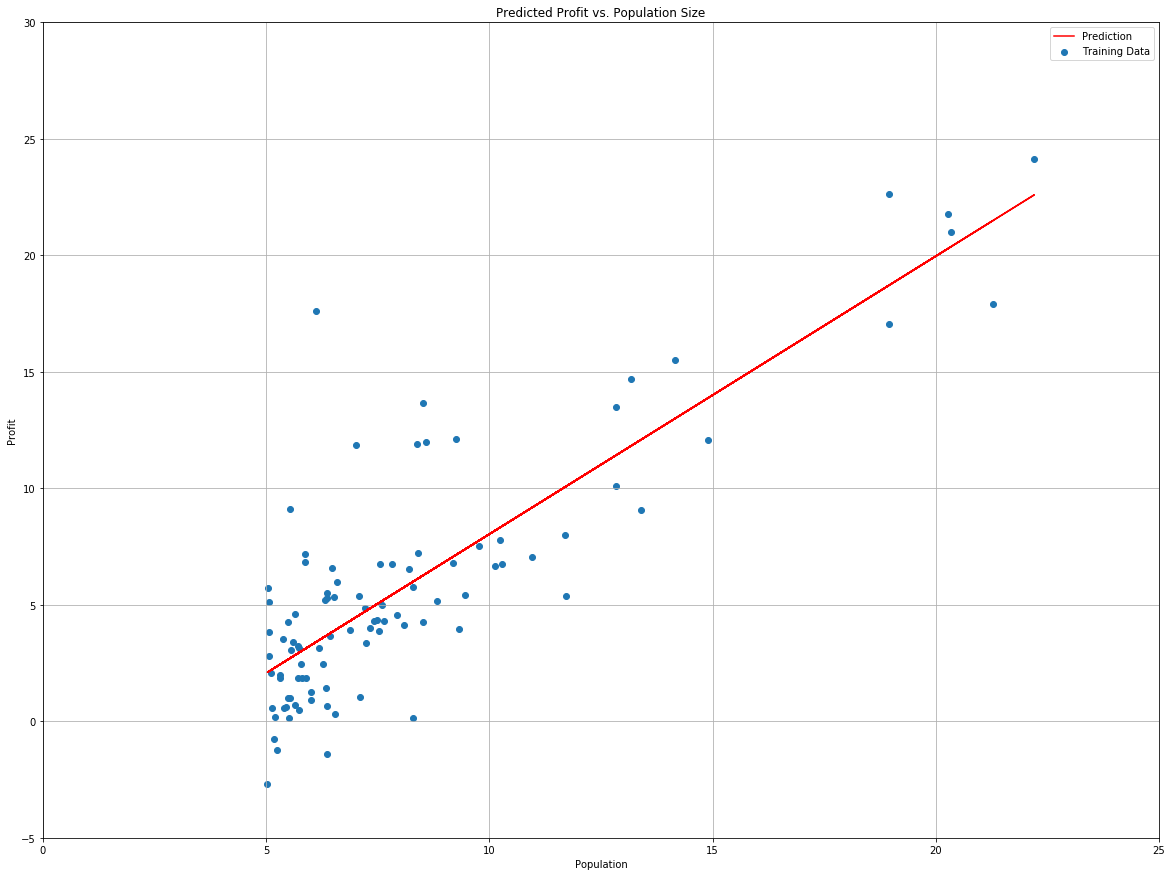

In [16]:
fig, ax = plt.subplots(figsize=(20,15)) # create fig and axes objects
ax.plot(x, y_predicted, 'r', label='Prediction') # plot x, y and 'r' red line, assign label, create a straight line
ax.scatter(data.Population, data.Profit, label='Training Data') # overlay training data as scatter plot
ax.legend(loc=0)
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')
ax.set_xlim(0,25)
ax.set_ylim(-5,30)
ax.grid(True)

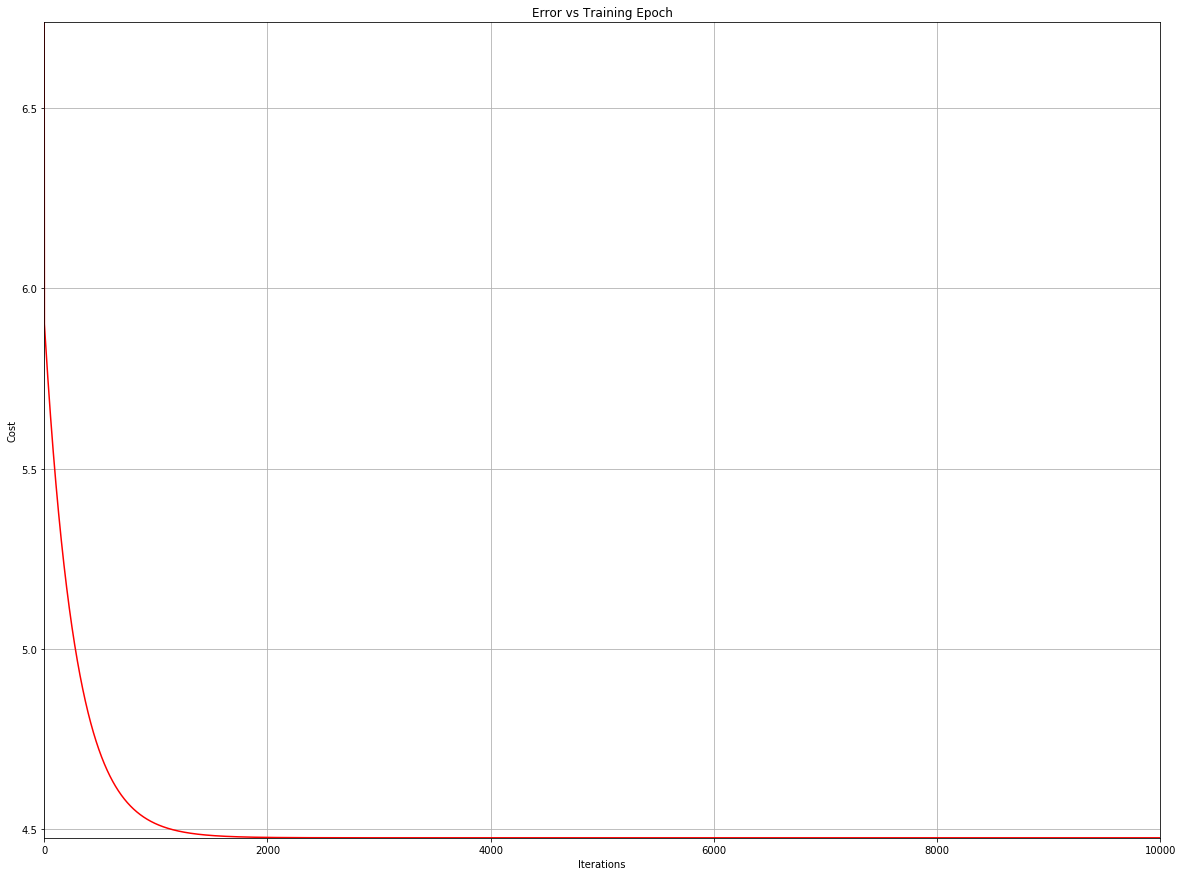

In [17]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
ax.set_xlim(0, iters)
ax.set_ylim(cost[iters-1], cost[0])
ax.grid(True)

Normal equation method

In [18]:
from scipy import linalg
theta_best = np.linalg.pinv(X.T*X)*X.T*y
theta_best

matrix([[-3.89578088],
        [ 1.19303364]])

In [19]:
compute_cost(X, y, theta_best)

4.476971375975179

Using scikit-learn

In [20]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Profit')

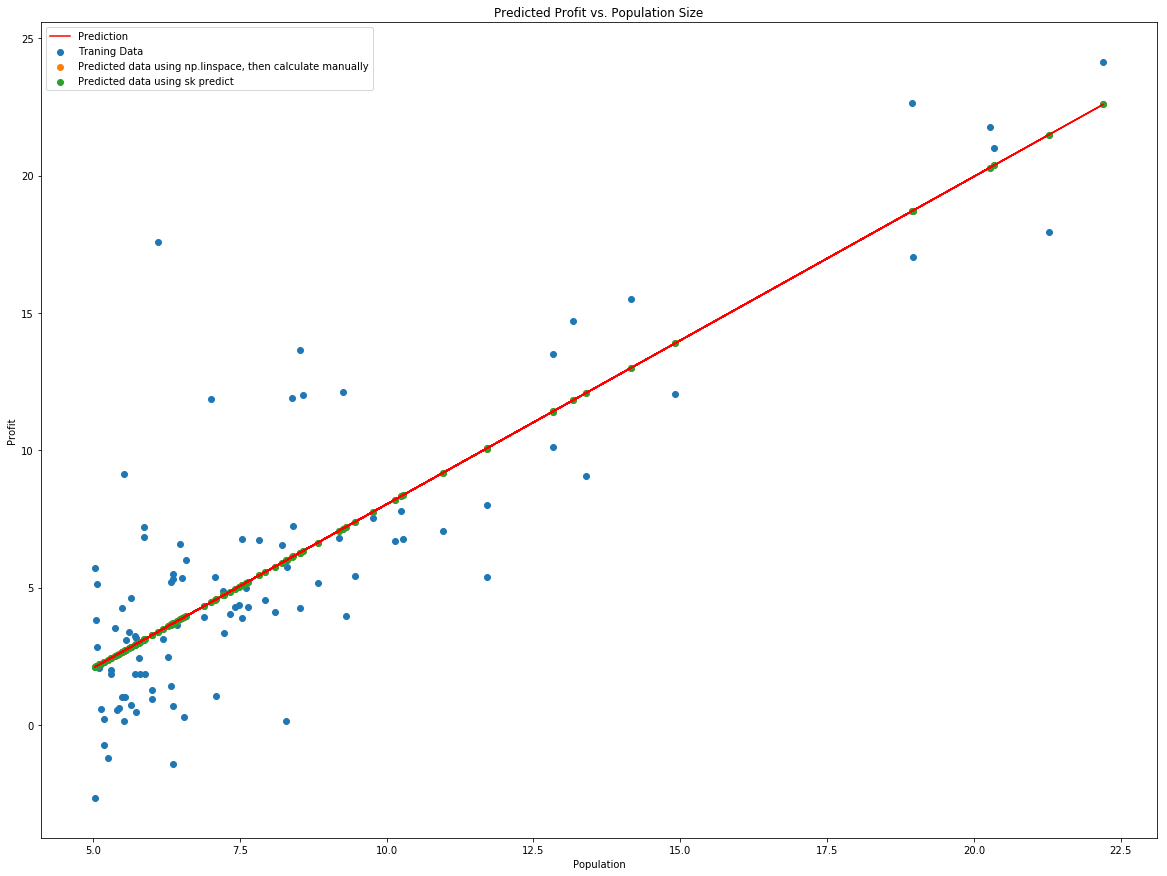

In [21]:
y_predicted2 = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(20,15))  
ax.plot(x, y_predicted2, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.scatter(x, y_predicted, label='Predicted data using np.linspace, then calculate manually')
ax.scatter(x, y_predicted2, label='Predicted data using sk predict')  
ax.legend(loc=2)  
ax.set_title('Predicted Profit vs. Population Size')  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  

Plotting J(theta) vs theta curve

In [22]:
# old method, manually creating temp then copy to theta_set

# iters = 1000
# temp = np.array(np.linspace(0, 1, iters)) # create a temp array of random data of theta1
# theta_set = np.zeros((temp.shape[0], 1)) # create a 1000 x 1 array of 0.0
# theta_set[:,0] = temp # copy the random data to the first column of theta_set
# theta_set = np.insert(theta_set, 0, theta_best[0], axis=1) # insert a whole column of number, (array, index, number, axis for whole column)

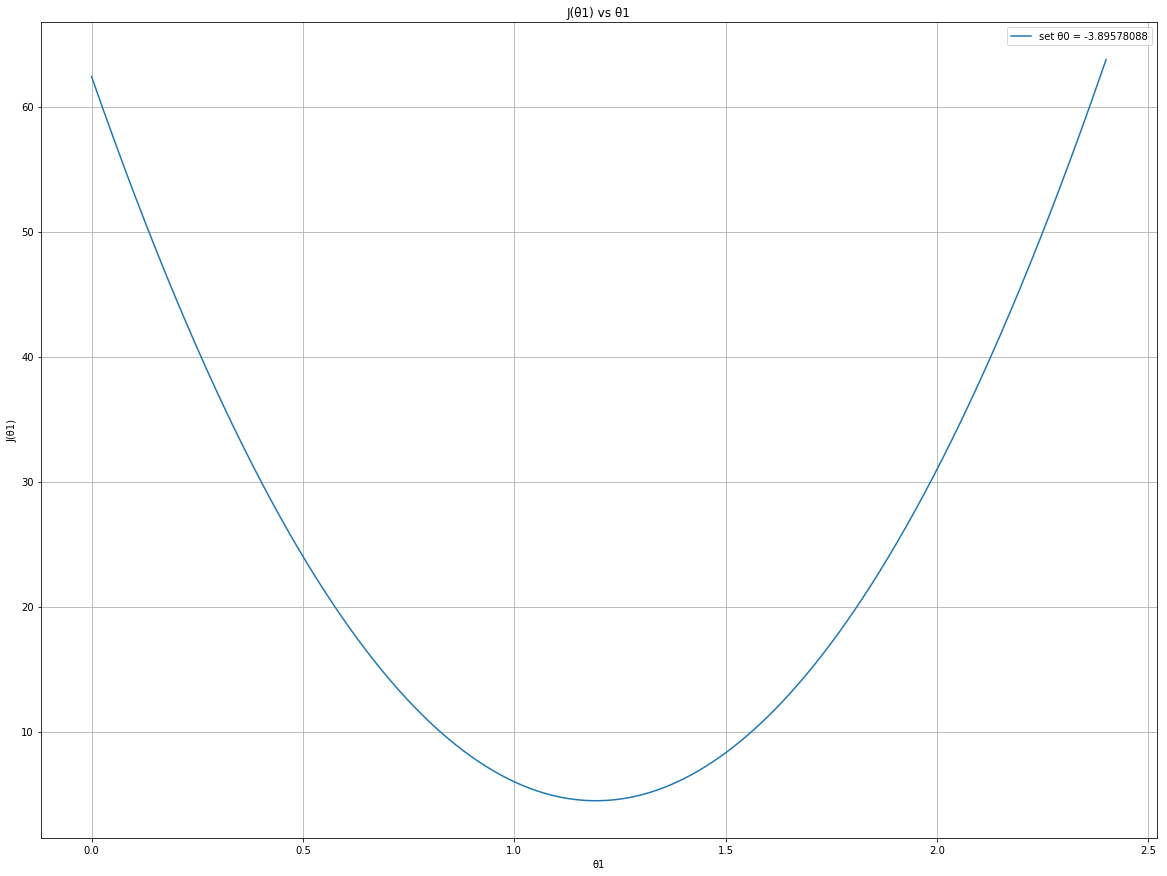

In [23]:
# plot J(theta) vs theta curve
# set theta0 to the value calculated above from theta_best
# results in simple 1D curve

iters = 1000
theta_set = np.array(np.linspace(0, 2.4, iters)).reshape((-1,1)) # create array of random data of theta1, then reshape to 1000*1 (-1 for as many as possible), as .T does not work
theta_set = np.insert(theta_set, 0, theta_best[0], axis=1) # insert a whole column of number, (array, index, number, axis for whole column)
cost = np.zeros(iters)
for i in range(iters):
    theta = theta_set[i].reshape((2,1)) # convert 1*2 array to 2*1 using reshape, .T does not work
    cost[i] = compute_cost(X, y, theta)
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(theta_set[:,1], cost, label='set θ0 = -3.89578088') # plot cost vs theta1
ax.set_xlabel('θ1')
ax.set_ylabel('J(θ1)')
ax.set_title('J(θ1) vs θ1')  
ax.grid(True)
ax.legend(loc=0)

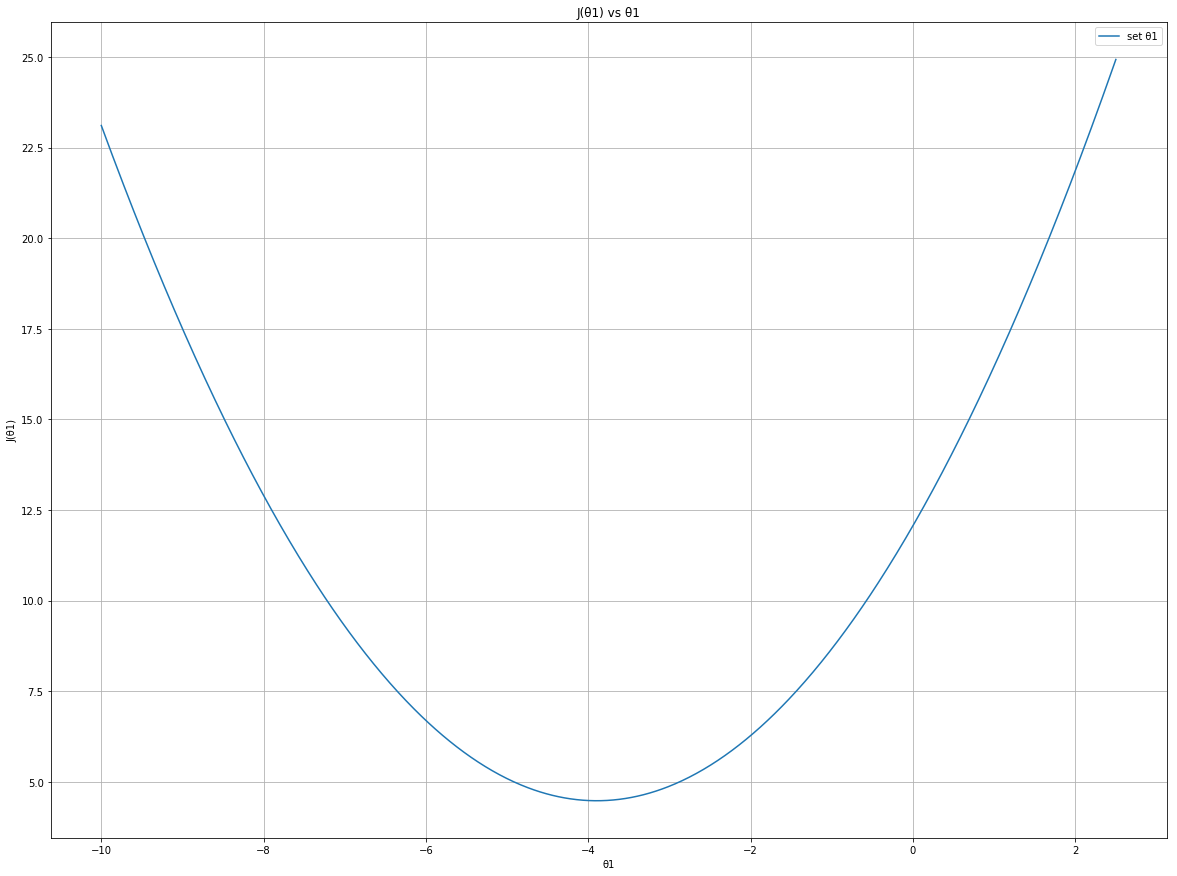

In [24]:
# plot J(theta) vs theta curve
# set theta1 to the value calculated above from theta_best
# results in simple 1D curve

iters = 1000
theta_set = np.array(np.linspace(-10, 2.5, iters)).reshape((-1,1)) # create array of random data of theta1, then reshape to 1000*1 (-1 for as many as possible), as .T does not work
theta_set = np.insert(theta_set, 1, theta_best[1], axis=1) # insert a whole column of number, (array, index, number, axis for whole column)
cost = np.zeros(iters)
for i in range(iters):
    theta = theta_set[i].reshape((2,1)) # convert 1*2 array to 2*1 using reshape, .T does not work
    cost[i] = compute_cost(X, y, theta)
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(theta_set[:,0], cost, label='set θ1') # plot cost vs theta1
ax.legend(loc=0)
ax.set_title('J(θ1) vs θ1')  
ax.set_xlabel('θ1')
ax.set_ylabel('J(θ1)')
ax.grid(True)

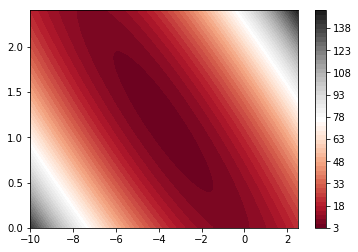

In [25]:
# plot J(theta) vs theta 2D contour

iters = 100
# create 2 arrays of random data of theta0 and 1, then reshape to -1*1
# use np.hstack to join the 2 arrays together, expanding column
theta_set = np.hstack(((np.array(np.linspace(-10,2.5, iters)).reshape((-1,1))),(np.array(np.linspace(0, 2.4, iters)).reshape((-1,1)))))
cost = np.zeros((iters,iters)) # create 1000x1000 array for cost, for storing the cost for each pair of theta0, theta1
cost
for i in range(iters):
    for j in range(iters):
        # create a theta array for computation later
        # 2 values of theta
        theta = np.array([[theta_set[i][0]], [theta_set[j][1]]])
        cost[i][j] = compute_cost(X, y, theta)

fig = plt.contourf(theta_set[:,0], theta_set[:,1], cost, 50, cmap = 'RdGy') # create a filled contour, using colormap Red-Grey
plt.colorbar() # create colorbar for scale